CLUSTERING Data Player

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
file_path = "/content/drive/MyDrive/Rekrutmen Player PUBG Mobile/Data_Player.xlsx"  # Ganti dengan nama file Anda
data = pd.read_excel(file_path)
print(data)

                       Nama       Nickname           ID     KD  Elimination  \
0          Ja'far Fizay Ali     JBRxJeeEVO  51644457608   9.66       1691.0   
1            Shahrul Abidin  JBRxJinbei4CR   5731450081   6.35       1689.0   
2    Guntur Bima Dirgantara   JBRXKingz4CR    580234417  11.09       2707.0   
3       Atla Achmad Mukhala       Athlaaaa   5107274516   8.20       4237.0   
4        Andreas Dwi Ananda         越　Tera   5191920530  11.70       1240.0   
..                      ...            ...          ...    ...          ...   
589                     NaN     RRQxKelly2    569273581   7.10          NaN   
590                     NaN   FAKEClaranst   5182187297   6.26          NaN   
591                     NaN            ID8   5255028061   9.63          NaN   
592                     NaN         chuchi   5293066961  10.19          NaN   
593                     NaN         WYM3NG   5644074884   7.65          NaN   

     Win Ratio (%)  Top 10 Rate (%)  Accuracy (%)  

In [4]:
features = ["KD", "Win Ratio (%)", "Accuracy (%)", "Headshot Rate (%)"]
for kolom in features:
    mean = data[kolom].mean()
    std = data[kolom].std()
    print(f'Fitur: {kolom}')
    print(f'  Mean: {mean}')
    print(f'  Standar Deviasi: {std}')
    print('-----------------------------')

Fitur: KD
  Mean: 7.261835016835018
  Standar Deviasi: 2.808864821396058
-----------------------------
Fitur: Win Ratio (%)
  Mean: 29.614646464646462
  Standar Deviasi: 15.507585185088566
-----------------------------
Fitur: Accuracy (%)
  Mean: 17.70084175084175
  Standar Deviasi: 2.6963123837380394
-----------------------------
Fitur: Headshot Rate (%)
  Mean: 16.233164983164983
  Standar Deviasi: 2.6374577192111994
-----------------------------


In [6]:
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
def kmeans_plus_plus_init_multiple(X, n_clusters, n_init=10, random_state=42):
    best_inertia = float('inf')
    best_centroids = None

    for _ in range(n_init):
        centroids = kmeans_plus_plus_init(X, n_clusters, random_state)
        inertia = np.sum(pairwise_distances(X, centroids).min(axis=1))  # Hitung inertia

        if inertia < best_inertia:
            best_inertia = inertia
            best_centroids = centroids

    return best_centroids

# Contoh penggunaan:
initial_centroids = kmeans_plus_plus_init_multiple(X_scaled, n_clusters=2, n_init=10, random_state=42)
print("📌 Centroid awal terbaik (dengan n_init=10):")
print(scaler.inverse_transform(initial_centroids))
print(initial_centroids)

📌 Centroid awal terbaik (dengan n_init=10):
[[ 8.73 26.   19.3  12.6 ]
 [ 4.1  21.2  17.5  15.3 ]]
[[ 0.52313033 -0.23328538  0.59359073 -1.37868639]
 [-1.12661166 -0.5430722  -0.07455035 -0.3541105 ]]


Jumlah iterasi hingga konvergen: 10
Centroid Cluster:
[[ 9.38601423 38.20711744 19.39644128 15.99857651]
 [ 5.35482428 21.90063898 16.17859425 16.44376997]]
[[ 0.75687854  0.55454881  0.62938872 -0.08901989]
 [-0.67949799 -0.49785372 -0.56504227  0.07991881]]

Jumlah pemain dalam setiap cluster:
Cluster
1    313
0    281
Name: count, dtype: int64
                        Nama      Nickname           ID     KD  Elimination  \
0           Ja'far Fizay Ali    JBRxJeeEVO  51644457608   9.66       1691.0   
2     Guntur Bima Dirgantara  JBRXKingz4CR    580234417  11.09       2707.0   
3        Atla Achmad Mukhala      Athlaaaa   5107274516   8.20       4237.0   
4         Andreas Dwi Ananda        越　Tera   5191920530  11.70       1240.0   
5  Dustin Atallah Farrelsyah   DUSTYYĖBUNN   5256960890   8.62       1630.0   

   Win Ratio (%)  Top 10 Rate (%)  Accuracy (%)  Headshot Rate (%)  \
0           25.7             67.4          19.5               18.3   
2           26.6             67.2   

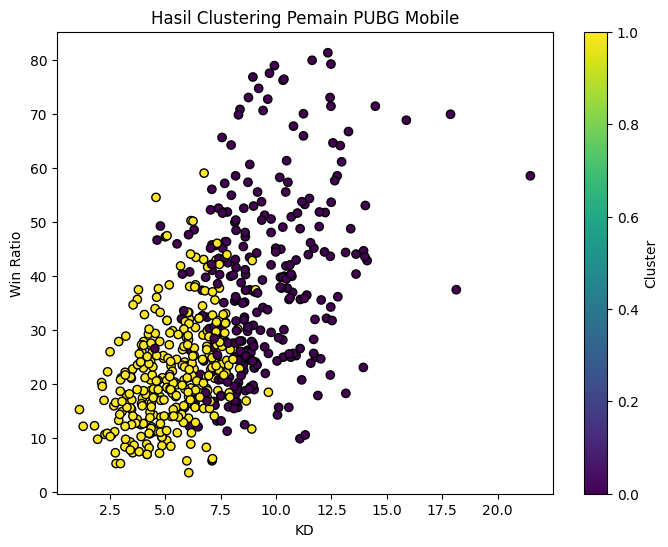

In [7]:
# Menentukan jumlah cluster (k=2 untuk Layak / Tidak Layak)
k = 2
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Melakukan clustering
data["Cluster"] = kmeans.fit_predict(X_scaled)

# Menampilkan hasil clustering
print(f"Jumlah iterasi hingga konvergen: {kmeans.n_iter_}")
print("Centroid Cluster:")
print(scaler.inverse_transform(kmeans.cluster_centers_))  # Menampilkan centroid dalam skala asli
print(kmeans.cluster_centers_)  # Menampilkan centroid dalam skala asli
print("\nJumlah pemain dalam setiap cluster:")
print(data["Cluster"].value_counts())
print(data[data["Cluster"] == 0].head())  # Pemain di Cluster 0
print(data[data["Cluster"] == 1].head())  # Pemain di Cluster 1

# # Menyimpan hasil clustering ke file baru
# output_file = "/content/drive/MyDrive/Rekrutmen Player PUBG Mobile/Hasil_Cluster3.xlsx"
# data.to_excel(output_file, index=False)
# print(f"\nHasil clustering disimpan di: {output_file}")

# Visualisasi clustering (Scatter Plot 2D menggunakan KD Ratio dan Win Ratio)
plt.figure(figsize=(8,6))
plt.scatter(data["KD"], data["Win Ratio (%)"], c=data["Cluster"], cmap='viridis', edgecolors='k')
plt.xlabel("KD")
plt.ylabel("Win Ratio")
plt.title("Hasil Clustering Pemain PUBG Mobile")
plt.colorbar(label="Cluster")
plt.show()

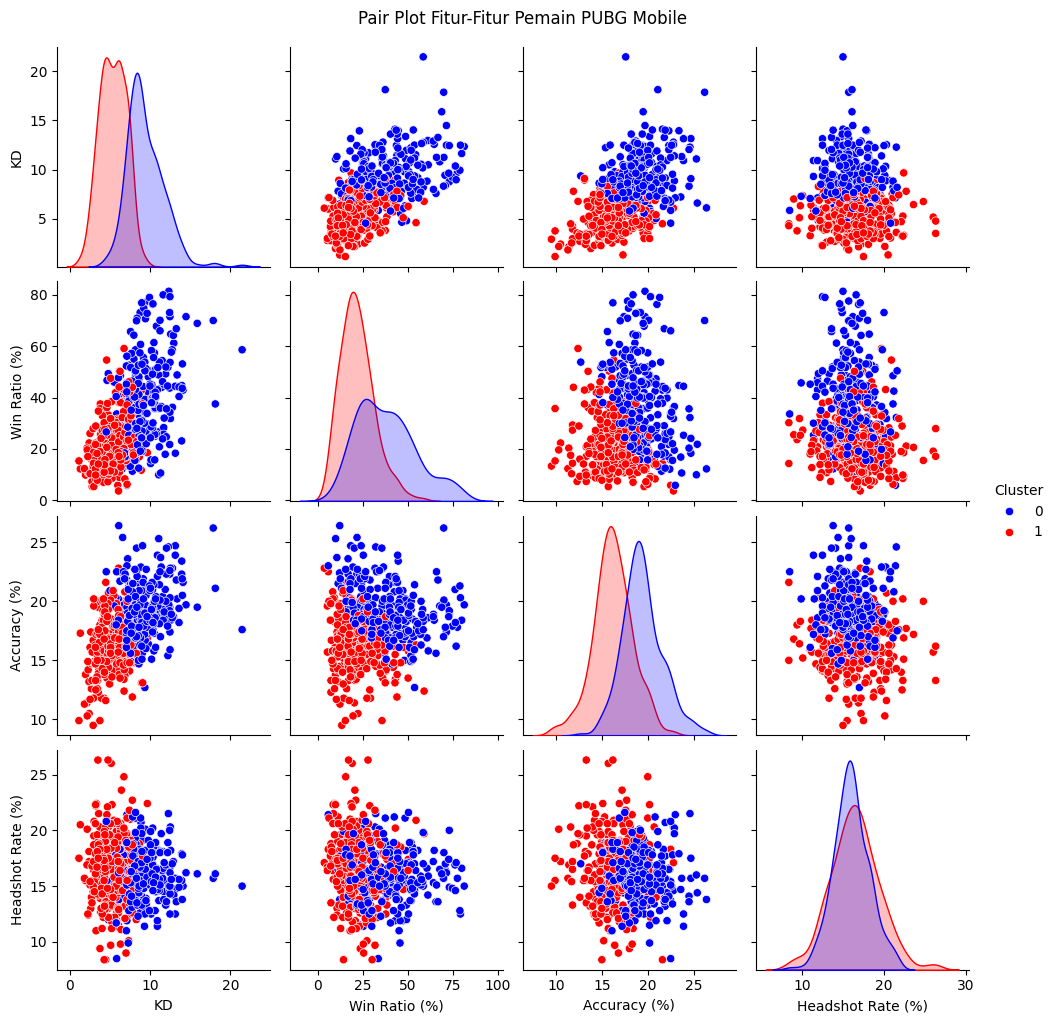

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gunakan palette manual: 0 = biru, 1 = merah
custom_palette = {0: "blue", 1: "red"}

sns.pairplot(
    data,
    vars=["KD", "Win Ratio (%)", "Accuracy (%)", "Headshot Rate (%)"],
    hue="Cluster",
    palette=custom_palette
)

plt.suptitle("Pair Plot Fitur-Fitur Pemain PUBG Mobile", y=1.02)

# Simpan gambar pairplot ke file (misalnya 'pairplot.png')
plt.savefig("/content/drive/MyDrive/Rekrutmen Player PUBG Mobile/pairplot.png")

plt.show()


In [ ]:
# 1️⃣ Menghitung rata-rata dari setiap cluster
cluster_means = data.groupby("Cluster")[["KD", "Win Ratio (%)", "Accuracy (%)", "Headshot Rate (%)"]].mean() #

# 2️⃣ Menentukan perbatasan (batas tengah antara dua centroid)
centroids = kmeans.cluster_centers_  # Centroid hasil clustering
boundary = np.mean(centroids, axis=0)  # Menghitung titik tengah antar cluster

# Konversi kembali perbatasan ke skala asli
boundary_original = scaler.inverse_transform([boundary])  # boundary adalah hasil sebelumnya

# 3️⃣ Menampilkan hasil
print("Rata-rata Fitur untuk Setiap Cluster:")
print(cluster_means)

print("\nPerbatasan antara Cluster Layak dan Tidak Layak (Skala Asli):")
print(boundary_original)

Rata-rata Fitur untuk Setiap Cluster:
               KD  Win Ratio (%)  Accuracy (%)  Headshot Rate (%)
Cluster                                                          
0        5.294632      21.706135     16.162577          16.416258
1        9.372226      38.169965     19.382686          16.011307

Perbatasan antara Cluster Layak dan Tidak Layak (Skala Asli):
[[ 7.34006458 29.96446093 17.77818498 16.21319051]]


In [8]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.3f}")


Silhouette Score: 0.253
